In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
#import data from csv files
df = pd.read_csv('C:/Users/91812/Documents/projects/mlassignment/adult.csv')

# Replace the Missing values

In [3]:
#replace the ? with nan
df.replace('?', np.nan, inplace= True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
category_col=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
numeric_col=['age','fnlwgt','education.num','capital.gain', 'capital.loss', 'hours.per.week']
print('Total Number of attributes :',len(category_col)+len(numeric_col))
print('Number of nominal attributes:',len(category_col))
print('Number of Numerical attributres:',len(numeric_col))

Total Number of attributes : 14
Number of nominal attributes: 8
Number of Numerical attributres: 6


age               : numerical data (continuous)
workclass         : categorical <8 types>
fnlwgt            : numerical data (continuous) 
education         : Remove column
education.num     : leave as is
marital.status    : categorical <16 types>
occupation        : categorical <14 types> 
relationship      : categorical <6 Types>
race              : categorical <5 Types>
sex               : categorical <2 Types>
capital.gain      : numerical data (continuous)
capital.loss      : numerical data (continuous)
hours.per.week    : numerical data (continuous)
native.country    : categorical <33 Types>
income            : numerical data (continuous)

In [6]:
for column in df:
    if df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
#To check the values which are empty
df.isnull()
df.dropna(how = 'all') 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Plot categorical data

Text(0.5, 1.0, 'workclass vs income')

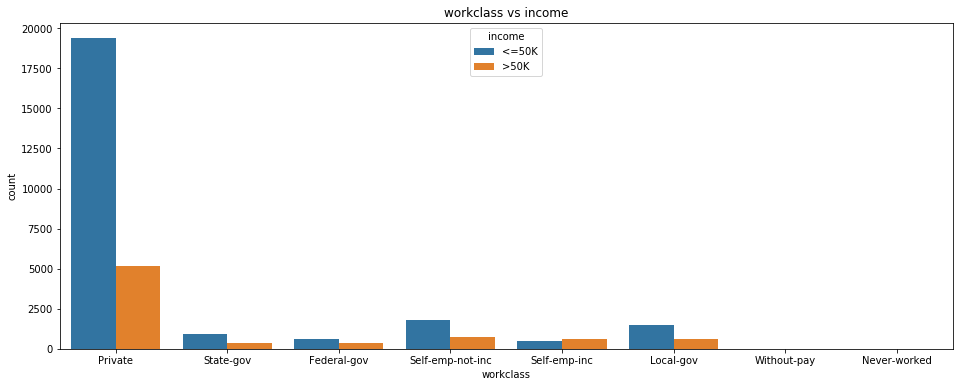

In [8]:
plt.figure(figsize=(16, 6))
sns.countplot(x="workclass", hue="income", data=df).set_title('workclass vs income')

Text(0.5, 1.0, 'education vs income')

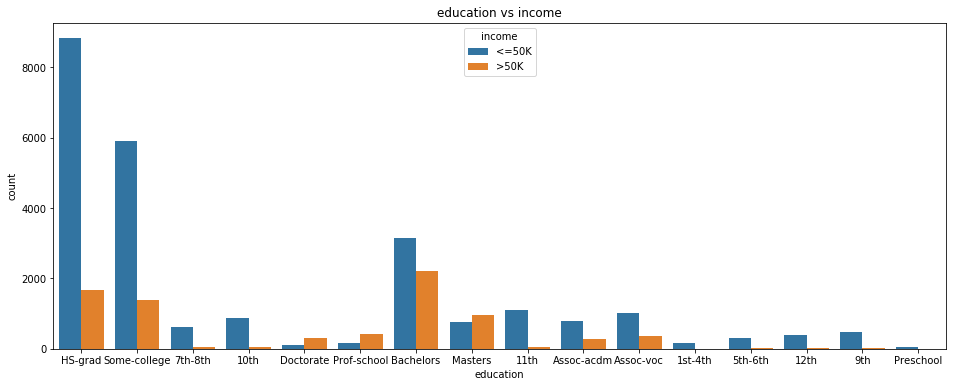

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(x="education", hue="income", data=df).set_title('education vs income')

Text(0.5, 1.0, 'occupation vs income')

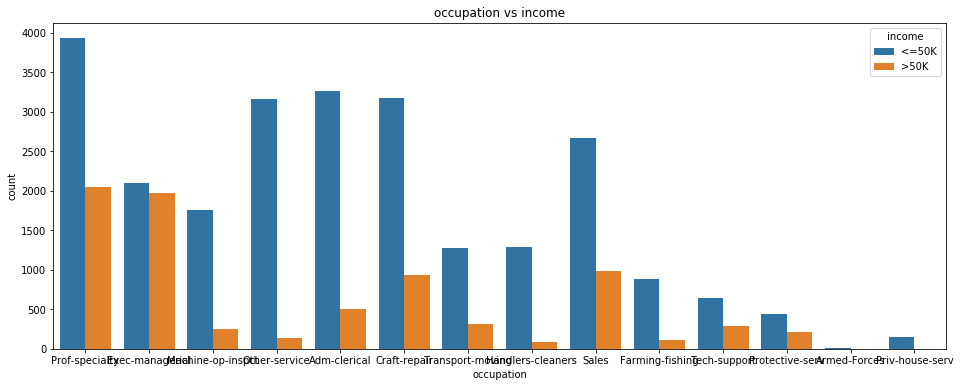

In [10]:
plt.figure(figsize=(16, 6))
sns.countplot(x="occupation", hue="income", data=df).set_title('occupation vs income')

Text(0.5, 1.0, 'marital.status vs income')

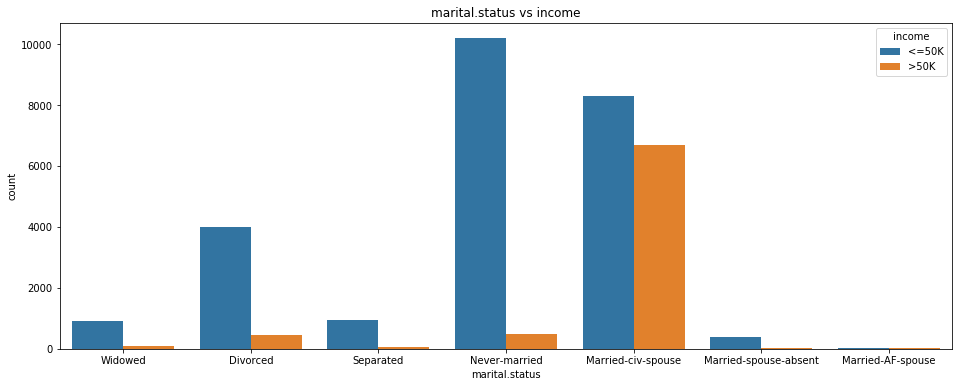

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(x="marital.status", hue="income", data=df).set_title('marital.status vs income')

Text(0.5, 1.0, 'relationship vs income')

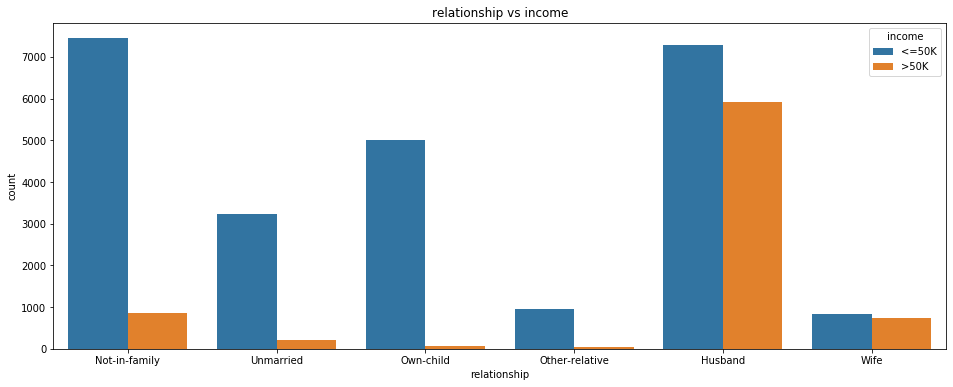

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x="relationship", hue="income", data=df).set_title('relationship vs income')

Text(0.5, 1.0, 'race vs income')

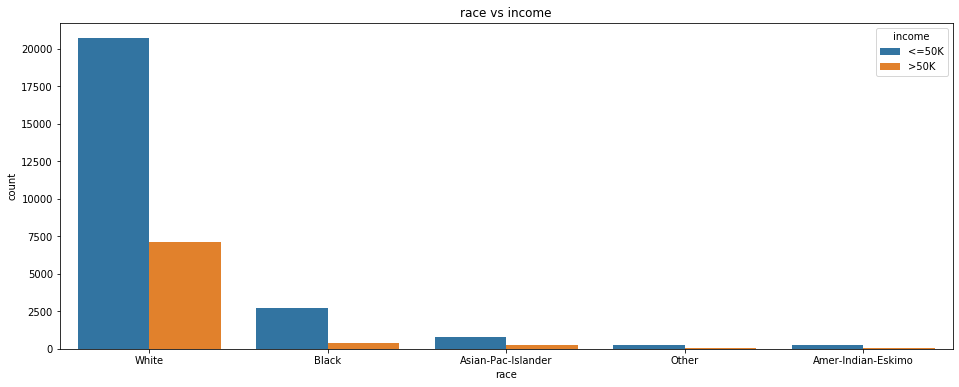

In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(x="race", hue="income", data=df).set_title('race vs income')

Text(0.5, 1.0, 'sex vs income')

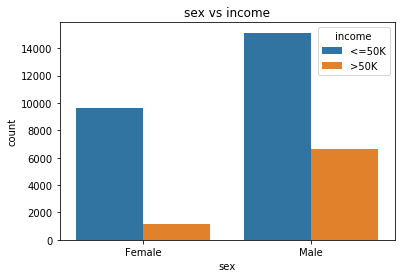

In [14]:
sns.countplot(x="sex", hue="income", data=df).set_title('sex vs income')

Text(0.5, 1.0, 'native.country vs income')

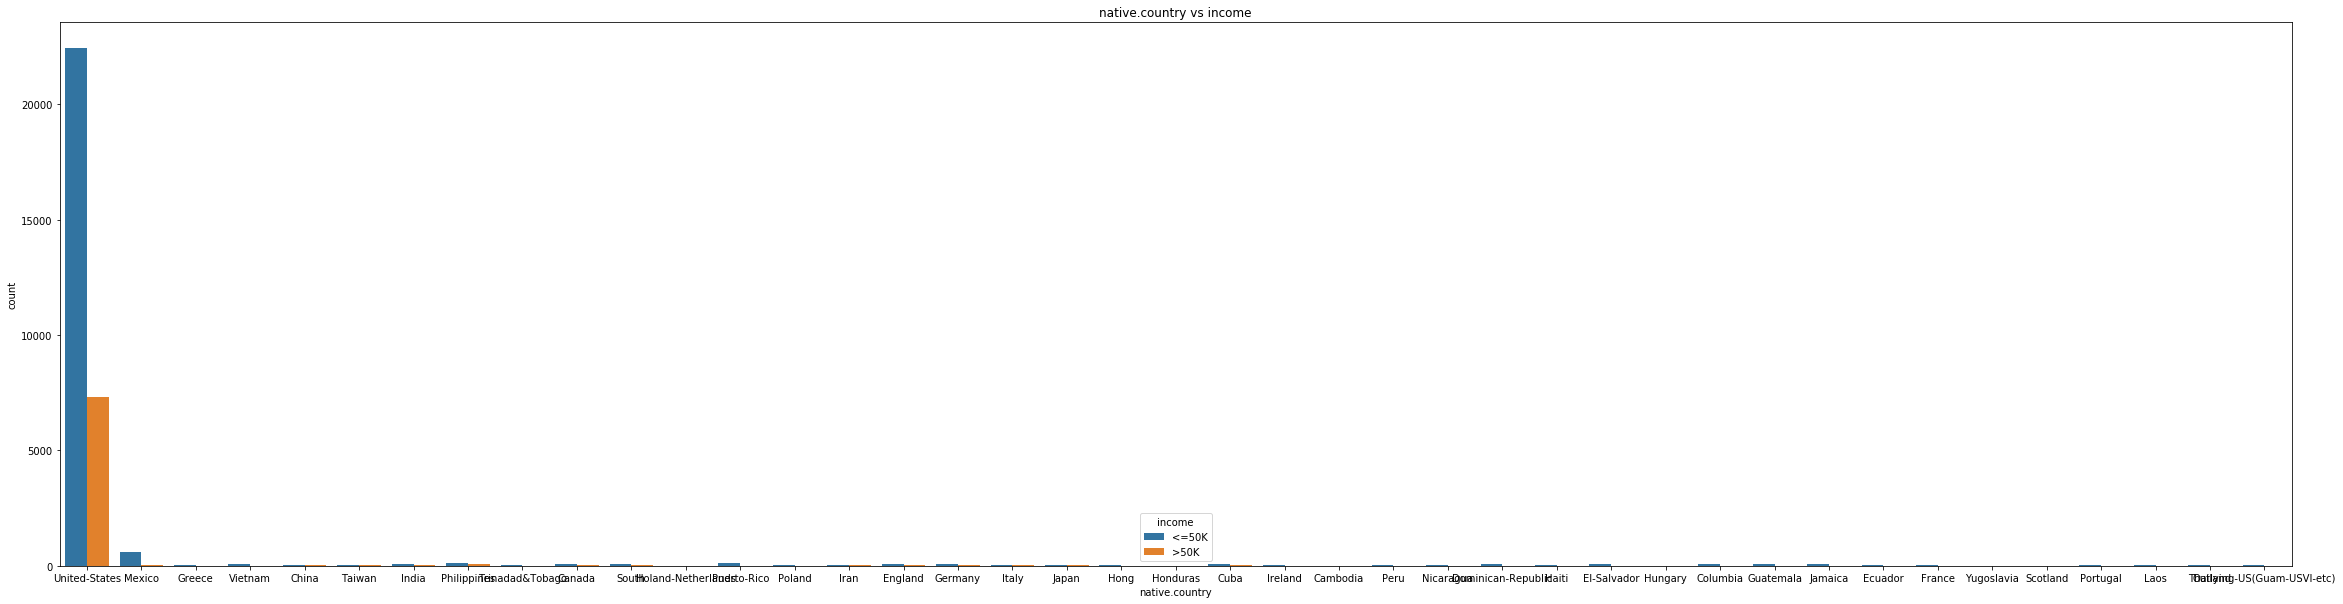

In [15]:
plt.figure(figsize=(40, 10))
sns.countplot(x="native.country", hue="income", data=df,).set_title('native.country vs income')

# Data Preprocessing ( Scaling, Encoding )

In [16]:
df = pd.get_dummies(df, columns=category_col, drop_first=True)
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [17]:
#StandardScaller applied to bring down the Scatter
scaler =  MinMaxScaler()
df[numeric_col] = pd.DataFrame(scaler.fit_transform(df[numeric_col]))

# Plot numerical data

Text(0.5, 1.0, 'numerical data scatter plot')

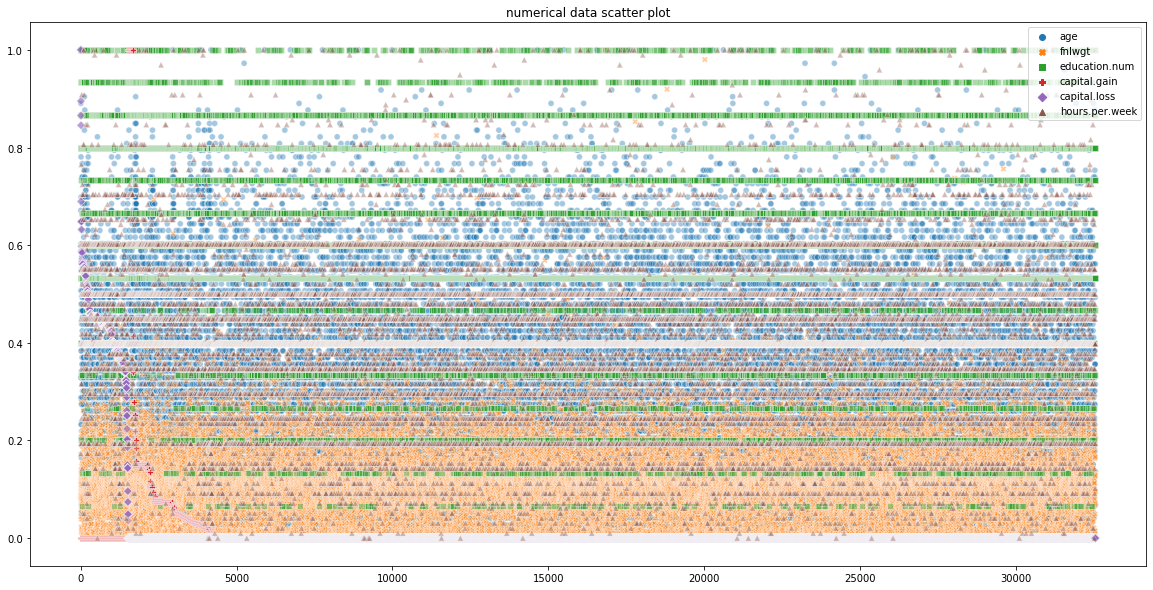

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df[numeric_col],alpha=0.4,hue='income').set_title('numerical data scatter plot')

In [19]:
#Separate X and target attributes
X = df.drop(columns=['income'])
y = df['income']
print("predictors = \n" ,X)
print("target = \n",y)

predictors = 
             age    fnlwgt  education.num  capital.gain  capital.loss  \
0      1.000000  0.043987       0.533333           0.0      1.000000   
1      0.890411  0.081896       0.533333           0.0      1.000000   
2      0.671233  0.118021       0.600000           0.0      1.000000   
3      0.506849  0.086982       0.200000           0.0      0.895317   
4      0.328767  0.171404       0.600000           0.0      0.895317   
...         ...       ...            ...           ...           ...   
32556  0.068493  0.202298       0.600000           0.0      0.000000   
32557  0.136986  0.166404       0.733333           0.0      0.000000   
32558  0.315068  0.096500       0.533333           0.0      0.000000   
32559  0.561644  0.094827       0.533333           0.0      0.000000   
32560  0.068493  0.128499       0.533333           0.0      0.000000   

       hours.per.week  workclass_Local-gov  workclass_Never-worked  \
0            0.397959                    0        

# Split the data into training set and testing set

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)

#  MultinomialNB Model - Accuracy and Confussion matrix

In [21]:
#using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mulnb = MultinomialNB()
mulnb.fit(X_train, y_train)
y_pred = mulnb.predict(X_test)
y_pred_train = mulnb.predict(X_train)

In [22]:
# Model Accuracy MultinomialNB

print('==============================TEST-SCORE(MultinomialNB)========================================')
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print('Test confusion_matrix:\n',confusion_matrix(y_test, y_pred))

==============================TEST-SCORE(MultinomialNB)========================================
Test Accuracy: 0.8131845634148838
Test confusion_matrix:
 [[6432  985]
 [ 840 1512]]


In [23]:
# Model hyperparameters MultinomialNB
print('Model hyperparameters: \n', mulnb.get_params())

Model hyperparameters: 
 {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


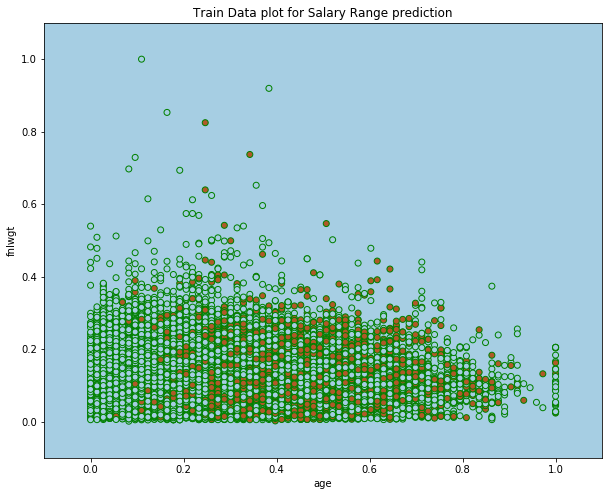

In [24]:
#Plot the decision boundary, visualize training data results
X_vis=X.iloc[:,:2].values
Y_vis=y
mulnb.fit(X_vis,Y_vis)

x_min,x_max = X_vis[:,0].min() - .1,X_vis[:,0].max()+.1
y_min,y_max =  X_vis[:,0].min() - .1,X_vis[:,0].max()+.1

h=.02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = mulnb.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)

plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_pred_train,edgecolors = 'g', cmap = plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.title("Train Data plot for Salary Range prediction")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()
plt.show()

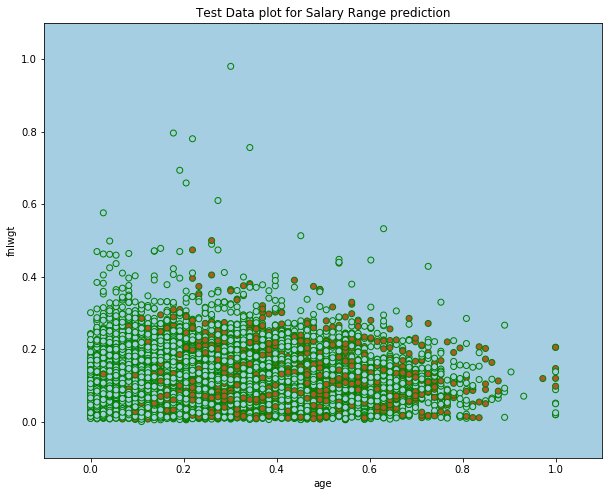

In [25]:
#Plot the decision boundary, visualize test data results
X_vis=X_train.iloc[:,:2].values
Y_vis=y_train
mulnb.fit(X_vis,Y_vis)

x_min,x_max = X_vis[:,0].min() - .1,X_vis[:,0].max()+.1
y_min,y_max =  X_vis[:,0].min() - .1,X_vis[:,0].max()+.1

h= .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = mulnb.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)

plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_pred,edgecolors = 'g', cmap = plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.title("Test Data plot for Salary Range prediction")

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()
plt.show()

# GaussianNB  Model - Accuracy and Confussion matrix

In [26]:
from sklearn.naive_bayes import GaussianNB
gausnb = GaussianNB()
gausnb.fit(X_train, y_train)

y_pred = gausnb.predict(X_test)
y_pred_train = gausnb.predict(X_train)

In [27]:
# Model Accuracy GaussianNB
print('==============================TEST-SCORE(GaussianNB)========================================')
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print('Test confusion_matrix:\n',confusion_matrix(y_test, y_pred))

==============================TEST-SCORE(GaussianNB)========================================
Test Accuracy: 0.5132562186508343
Test confusion_matrix:
 [[2789 4628]
 [ 127 2225]]


In [28]:
# Model hyperparameters GaussianNB
print('Model hyperparameters: \n', gausnb.get_params())

Model hyperparameters: 
 {'priors': None, 'var_smoothing': 1e-09}


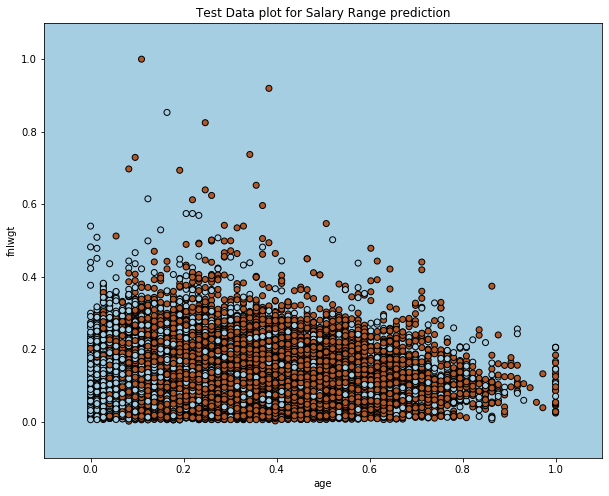

In [29]:
#Plot the decision boundary, visualize train data results
X_vis=X_train.iloc[:,:2].values
Y_vis=y_train
gausnb.fit(X_vis,Y_vis)

x_min,x_max = X_vis[:,0].min() - .1,X_vis[:,0].max()+.1
y_min,y_max =  X_vis[:,0].min() - .1,X_vis[:,0].max()+.1

h= .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = gausnb.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)

plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_pred_train,edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.title("Test Data plot for Salary Range prediction")

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()
plt.show()

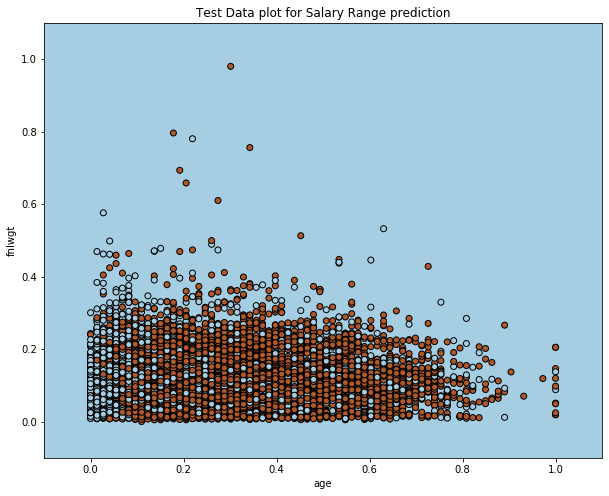

In [30]:
#Plot the decision boundary, visualize train data results
X_vis=X_train.iloc[:,:2].values
Y_vis=y_train
gausnb.fit(X_vis,Y_vis)

x_min,x_max = X_vis[:,0].min() - .1,X_vis[:,0].max()+.1
y_min,y_max =  X_vis[:,0].min() - .1,X_vis[:,0].max()+.1

h= .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = gausnb.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)

plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_pred,edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.title("Test Data plot for Salary Range prediction")

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()
plt.show()